In [4]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score



###  Loading and Preprocessing Images

In [5]:


# Function to resize and preprocess an image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
    image = cv2.equalizeHist(image)  
    image = image.astype(np.float32) / 255.0  
    print("Image is resized and processed")
    return image

# Input directories for debris and no debris images
debris_dir = r'data\debris'
no_debris_dir = r'data\no_debris'


In [6]:
#preprocess images, extracting SIFT features

In [7]:
image_paths = []
feature_vectors = []

for image_file in os.listdir(debris_dir):
    image_path = os.path.join(debris_dir, image_file)
    image = preprocess_image(image_path)
    image_paths.append(image_path)
    feature_vectors.append(image)

for image_file in os.listdir(no_debris_dir):
    image_path = os.path.join(no_debris_dir, image_file)
    image = preprocess_image(image_path)
    image_paths.append(image_path)
    feature_vectors.append(image)

# Convert the list of feature vectors to a NumPy array
feature_vectors = np.array(feature_vectors)

print("data preprocessed")




Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is

Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is

Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is

Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is

Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is

Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is

Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is resized and processed
Image is

###  Dimensionality Reduction with K-Means Clustering

In [8]:
# Flatten the SIFT descriptors
flattened_descriptors = [desc for desc_list in feature_vectors for desc in desc_list]

# Convert to a NumPy array
flattened_descriptors = np.array(flattened_descriptors)

# Perform K-Means clustering to reduce dimensionality
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
reduced_feature_vectors = kmeans.fit_transform(flattened_descriptors)

print("k-mean")

k-mean


### Preparing Labels and Splitting Data


In [9]:
# Prepare labels (1 for debris, 0 for no debris)
labels = np.array([1] * len(os.listdir(debris_dir)) + [0] * len(os.listdir(no_debris_dir)))
reduced_feature_vectors = reduced_feature_vectors[:1849]

X_train, X_test, y_train, y_test = train_test_split(
    reduced_feature_vectors,  # Your feature vectors
    labels,                   # Your labels
    test_size=0.2,
    random_state=42
)

print("Dataset split into train test")

Dataset split into train test


### Standardization

In [11]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Training the SVM Classifier 

In [12]:
# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm * 100:.2f}%")
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report (SVM):\n", report_svm)

SVM Classifier Accuracy: 77.03%
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       145
           1       0.78      0.86      0.82       225

    accuracy                           0.77       370
   macro avg       0.76      0.74      0.75       370
weighted avg       0.77      0.77      0.77       370



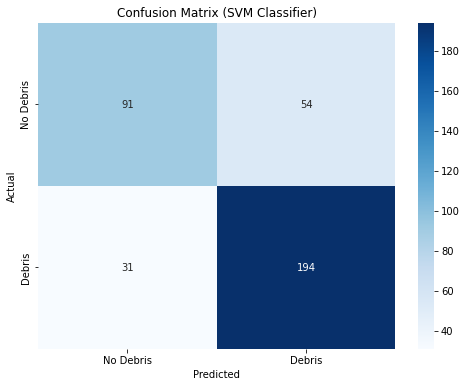

In [15]:
confusion_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Debris', 'Debris'], yticklabels=['No Debris', 'Debris'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM Classifier)')
plt.show()


### Decision Tree Classifier


In [16]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

#prediction
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

#evaluate
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Classifier Accuracy: {accuracy_decision_tree * 100:.2f}%")
report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print("Classification Report (Decision Tree):\n", report_decision_tree)


Decision Tree Classifier Accuracy: 90.81%
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       145
           1       0.92      0.93      0.93       225

    accuracy                           0.91       370
   macro avg       0.91      0.90      0.90       370
weighted avg       0.91      0.91      0.91       370



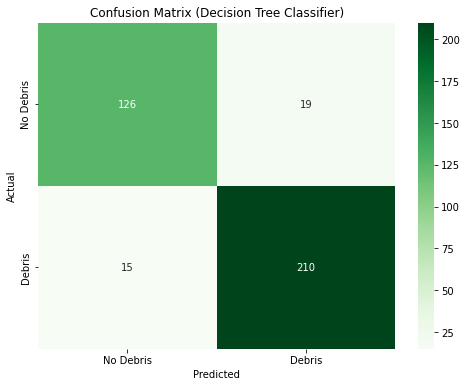

In [17]:
confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_decision_tree, annot=True, fmt='d', cmap='Greens', xticklabels=['No Debris', 'Debris'], yticklabels=['No Debris', 'Debris'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()


### Random Forest Classifier


In [18]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions with the Random Forest classifier
y_pred_random_forest = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Classifier Accuracy: {accuracy_random_forest * 100:.2f}%")
report_random_forest = classification_report(y_test, y_pred_random_forest)
print("Classification Report (Random Forest):\n", report_random_forest)


Random Forest Classifier Accuracy: 97.30%
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       145
           1       0.97      0.98      0.98       225

    accuracy                           0.97       370
   macro avg       0.97      0.97      0.97       370
weighted avg       0.97      0.97      0.97       370



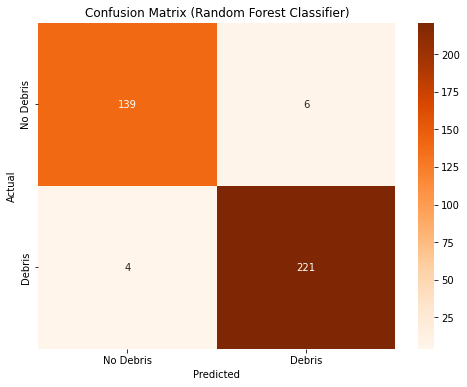

In [19]:
# Plot confusion matrix for Random Forest classifier
confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_random_forest, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Debris', 'Debris'], yticklabels=['No Debris', 'Debris'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()


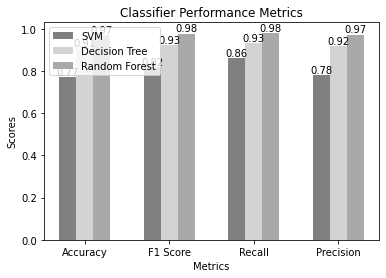

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score

# Assuming you have already trained and evaluated your classifiers as shown in your code

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score

# Assuming you have already trained and evaluated your classifiers as shown in your code

# Calculate F1 score, recall, and precision for each classifier
f1_svm = f1_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)

f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)

f1_random_forest = f1_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)

# Create lists of metrics and classifiers for plotting
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
svm_scores = [accuracy_svm, f1_svm, recall_svm, precision_svm]
decision_tree_scores = [accuracy_decision_tree, f1_decision_tree, recall_decision_tree, precision_decision_tree]
random_forest_scores = [accuracy_random_forest, f1_random_forest, recall_random_forest, precision_random_forest]

# Create a bar plot
x = range(len(metrics))
width = 0.2

plt.bar(x, svm_scores, width, color='gray', label='SVM')
plt.bar([i + width for i in x], decision_tree_scores, width, color='lightgray', label='Decision Tree')
plt.bar([i + 2 * width for i in x], random_forest_scores, width, color='darkgray', label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Classifier Performance Metrics')
plt.xticks([i + width for i in x], metrics)
plt.legend()

# Add labels above the bars
for i in x:
    plt.text(i, svm_scores[i], f'{svm_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(i + width, decision_tree_scores[i], f'{decision_tree_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(i + 2 * width, random_forest_scores[i], f'{random_forest_scores[i]:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()
